# Assignment 6

[套索模型選擇：AIC-BIC / 交叉驗證](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html)

#### Student ID: B082040005

#### Name: 高念慈

## 2
For parts (a) through (c), indicate (指明) which of i. through iv. is correct.
Justify your answer.

(a) The lasso, relative to least squares, is:
    <ol style="list-style-type:lower-roman">
    <li>More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.</li>
    <li>More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.</li>
    <li>Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.</li>
    <li>Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.</li>
    </ol>

> Ans: (iii)<br><br>
(i)錯誤的。Lasso 減少了變量的數量，因此不太靈活。<br>
(ii)錯誤的。與 (i) 中的理由相同。<br>
(iv)錯誤的。一般來說，lasso 會減少方差並增加偏差。方差的減少應該補償偏差的增加。

> Ans: (iii)<br>加入懲罰項會降低模型的 flexible，因此 bias 上升，variance 下降，若 bias 上升速度小於 variance 下降速度，則整體 MSE 下降。

(b) Repeat (a) for ridge regression relative to least squares.

> Ans: (iii)<br><br>
(i)錯誤的。減少了變量的數量，因此不太靈活。<br>
(ii)錯誤的。與 (i) 中的理由相同。<br>
(iv)錯誤的。一般來說，會減少方差並增加偏差。方差的減少應該補償偏差的增加。

> Ans: (iii)<br>加入懲罰項會降低模型的 flexible，因此 bias 上升，variance 下降，若 bias 上升速度小於 variance 下降速度，則整體 MSE 下降。

(c) Repeat (a) for non-linear methods relative to least squares.

> Ans: (ii)<br><br>
(i)錯誤的。一般來說，非線性方法會減少偏差並增加方差。偏差的減少應該補償方差的增加。<br>
(ii)是的。<br>
(iii)錯誤。非線性方法更靈活，因為它們適應數據。與最小二乘法不同，非線性方法不假定預測變量和響應之間的參數化關係。<br>
(iv)錯誤的。與 (iii) 中的理由相同。

> Ans: (ii) <br>越 flexible 的方法越能降低 bias，因此當 variance 上升速度小於 bias下降速度時，整體 MSE 下降。

## 3
Suppose we estimate the regression coefficients in a linear regression
model by minimizing

$$\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^{p} \beta_jx_{ij}\right)^2\ \text{subject to}\ \sum_{j=1}^{p} |\beta_j|\leq s$$ 

for a particular value of s. For parts (a) through (e), indicate which
of i. through v. is correct. Justify your answer.

(a) As we increase s from 0, the training RSS will:
    <ol style="list-style-type:lower-roman">
    <li>Increase initially, and then eventually start decreasing in an
inverted U shape.</li>
    <li>Decrease initially, and then eventually start increasing in a
U shape.</li>
    <li>Steadily increase.</li>
    <li>Steadily decrease.</li>
    <li>Remain constant.</li>
    </ol>

> Ans: (iv)<br><br>
穩步下降。隨著我們增加s, 我們正在解除限制βj，增加模型的靈活性並允許持續減少訓練錯誤

(b) Repeat (a) for test RSS.

> Ans: (ii)<br><br>
最初減少，然後最終開始以 U 形增加。<br><br>
隨著我們增加s, 我們正在解除限制βj，不斷增加模型的靈活性，從而導致偏差-方差權衡。<br><br>
首先，偏差的減少將大於方差的增加，從而導致測試誤差的減少。<br>
但最終模型會變得過於靈活，方差的增加會大於導致過擬合的偏差減少，以及測試誤差的增加。


(c) Repeat (a) for variance.

> Ans: (iii)<br><br>
穩步增加。因為我們要解除限制βj，為了更好地擬合和減少訓練誤差，<br>
我們不斷地增加模型的靈活性，從而增加它的方差。<br><br>

(d) Repeat (a) for (squared) bias.

> Ans: (iv)<br><br>
穩步下降。<br>
一般來說，更靈活的模型具有更少的偏差和更高的方差<br>
相比之下，更嚴格的模型具有較高的偏差和較低的方差

(e) Repeat (a) for the irreducible error.

> Ans: (v)<br><br>
Remain constant.<br>
根據定義，模型無法捕捉到不可約誤差，
與 s 的值無關、獨立。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
from tqdm import tqdm, trange

import statsmodels.formula.api as smf
import statsmodels.api as sm
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.preprocessing import scale, StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression, PLSSVD

# PLS 回歸。
# PLSRegression 也稱為 PLS2 或 PLS1，具體取決於目標的數量。

# PLSSVD
# 偏最小二乘 SVD。
# 該轉換器只是對交叉協方差矩陣執行 SVD X'Y。它能夠投影訓練數據X和目標 Y。
# 訓練數據X投影在左奇異向量上，而目標投影在右奇異向量上。

## 8
In this exercise, we will generate simulated data, and will then use
this data to perform best subset selection.

(a) Use the <span style="color:red">np.random.normal()</span> function to generate a predictor $X$ of length
$n = 100$, as well as a noise vector $\epsilon$ of length $n = 100$.

In [2]:
# X, 𝜖

In [3]:
# coding your answer here.
n = 100
X = np.random.normal(size = n)
𝜖 = np.random.normal(size = n)

(b) Generate a response vector $Y$ of length $n = 100$ according to
the model

$$Y=\beta_0 +\beta_1 X+\beta_2 X^2 +\beta_3 X^3+\epsilon$$

where $\beta_0,\ \beta_1,\ \beta_2,\ \text{and}\ \beta_3$ are constants of your choice.

In [4]:
# coding your answer here.
𝛽0, 𝛽1, 𝛽2, 𝛽3 = 4, 3, 2, 1
Y = 𝛽0 + 𝛽1 * X + 𝛽2 * X**2 + 𝛽3 * X**3 + 𝜖

(c) Perform best subset selection (最佳子集選擇、向前逐步和向後逐步) in order to choose the best model containing the predictors $X,X^2, \dots ,X^{10}$. What is the best model obtained according to $C_p$, BIC, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained.

[模型選擇：Cp、AIC、BIC 和調整後的 R²](https://github.com/phonchi/nsysu-math524/blob/master/static_files/presentations/Chapter_6_Lab.ipynb)

In [5]:
def all_subsets(p):
    return np.array([np.array(
        list(f"%0{p}d"%int("{0:b}".format(i)))
        , dtype=int
    ) > 0 for i in range(2 ** p)])[1:]

def Cp(part_model, full_model):
    n = full_model.nobs
    p = full_model.df_model
    d = part_model.df_model
    return (1 / n) * (part_model.ssr + 2 * d * full_model.ssr / (n - p - 1))

In [6]:
p = 10
XS = X[None,:].T.dot(np.ones((1, p))) ** np.arange(1, p + 1)
subs = all_subsets(p)

XS_train, XS_test, Y_train, Y_test = train_test_split(XS, Y, train_size=1)

In [9]:
XS.shape

(100, 10)

In [7]:
all_subsets(3)

array([[False, False,  True],
       [False,  True, False],
       [False,  True,  True],
       [ True, False, False],
       [ True, False,  True],
       [ True,  True, False],
       [ True,  True,  True]])

### Model

In [8]:
full_model = sm.OLS(Y, XS).fit()

best_aic = [np.inf, None, None]
best_bic = [np.inf, None, None]
best_rsquared_adj = [0, None, None]
best_Cp = [np.inf, None, None]

all_models = []

for i in tqdm(range(len(subs)), position=0):
    part_model = sm.OLS(Y, sm.add_constant(XS[:,subs[i]])).fit()
    part_model.Cp = Cp(part_model, full_model)
    
    all_models.append(part_model)
    
    if best_aic[0] > part_model.aic:
        best_aic[0] = part_model.aic
        best_aic[1] = i
        best_aic[2] = part_model
    
    if best_bic[0] > part_model.bic:
        best_bic[0] = part_model.bic
        best_bic[1] = i
        best_bic[2] = part_model
    
    if best_rsquared_adj[0] < part_model.rsquared_adj:
        best_rsquared_adj[0] = part_model.rsquared_adj
        best_rsquared_adj[1] = i
        best_rsquared_adj[2] = part_model
    
    if best_Cp[0] > part_model.Cp:
        best_Cp[0] = part_model.Cp
        best_Cp[1] = i
        best_Cp[2] = part_model

100%|████████████████████████████████████████████████████████████████████████████| 1023/1023 [00:00<00:00, 1610.23it/s]


In [8]:
def split_by_first_value(ls):
    s = set()
    for elem in ls:
        s.add(elem[0])
    d = {}
    for i in s:
        d[f'{i}'] = []
    for elem in ls:
        d[f'{elem[0]}'].append(elem)
    return [it[1] for it in d.items()]

In [9]:
vs_aic = []
vs_bic = []
vs_rsquared_adj = []
vs_Cp = []
for md in all_models:
    d = len(md.params) - 1
    vs_aic.append([d, md.aic])
    vs_bic.append([d, md.bic])
    vs_rsquared_adj.append([d, md.rsquared_adj])
    vs_Cp.append([d, md.Cp])

vs_aic =          split_by_first_value(vs_aic)
vs_bic =          split_by_first_value(vs_bic)
vs_rsquared_adj = split_by_first_value(vs_rsquared_adj)
vs_Cp =           split_by_first_value(vs_Cp)

[x.sort() for x in vs_aic]
[x.sort() for x in vs_bic]
[x.sort() for x in vs_rsquared_adj]
[x.sort() for x in vs_Cp]

vs_aic =          np.array([i[0] for i in vs_aic]).T
vs_bic =          np.array([i[0] for i in vs_bic]).T
vs_rsquared_adj = np.array([i[-1] for i in vs_rsquared_adj]).T
vs_Cp =           np.array([i[0] for i in vs_Cp]).T

Text(0, 0.5, "Mallows's Cp")

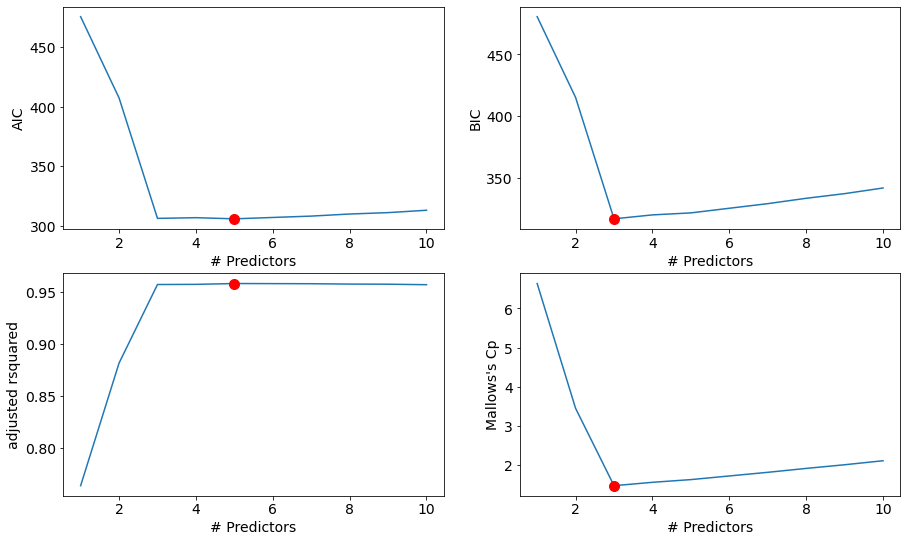

In [10]:
# coding your answer here.
plt.figure(figsize=(15,9))
plt.rcParams.update({'font.size': 14, 'lines.markersize': 10})

ax = plt.subplot(2, 2, 1)
plt.plot(*vs_aic)
plt.plot(*vs_aic[:,vs_aic[1].argmin()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('AIC')

ax = plt.subplot(2, 2, 2)
plt.plot(*vs_bic)
plt.plot(*vs_bic[:,vs_bic[1].argmin()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('BIC')

ax = plt.subplot(2, 2, 3)
plt.plot(*vs_rsquared_adj)
plt.plot(*vs_rsquared_adj[:,vs_rsquared_adj[1].argmax()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('adjusted rsquared')

ax = plt.subplot(2, 2, 4)
plt.plot(*vs_Cp)
plt.plot(*vs_Cp[:,vs_Cp[1].argmin()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('Mallows\'s Cp')

In [11]:
betas = np.array([f'beta{i}' for i in range(XS.shape[-1] + 1)])

In [62]:
betas

array(['beta0', 'beta1', 'beta2', 'beta3', 'beta4', 'beta5', 'beta6',
       'beta7', 'beta8', 'beta9', 'beta10'], dtype='<U6')

# Coefficients of $\mbox{AIC}$ model

In [12]:
dict(zip(betas[np.hstack([[True], subs[best_aic[1]]])], best_aic[2].params))

{'beta0': 3.7368453330563307,
 'beta1': 2.4661356838253465,
 'beta2': 2.660208863926494,
 'beta3': 1.2100859366019612,
 'beta4': -0.3920096185732398,
 'beta6': 0.04821284684957158}

# Coefficients of $\mbox{BIC}$ model

In [13]:
dict(zip(betas[np.hstack([[True], subs[best_aic[1]]])], best_bic[2].params))

{'beta0': 3.863214775997744,
 'beta1': 2.59863529104834,
 'beta2': 1.991233468676993,
 'beta3': 1.1462655913185709}

# Coefficients of $\mbox{Adj } R^2$ model

In [14]:
dict(zip(betas[np.hstack([[True], subs[best_aic[1]]])], best_rsquared_adj[2].params))

{'beta0': 3.7368453330563307,
 'beta1': 2.4661356838253465,
 'beta2': 2.660208863926494,
 'beta3': 1.2100859366019612,
 'beta4': -0.3920096185732398,
 'beta6': 0.04821284684957158}

# Coefficients of $\mbox{Cp}$ model

In [15]:
dict(zip(betas[np.hstack([[True], subs[best_aic[1]]])], best_Cp[2].params))

{'beta0': 3.863214775997744,
 'beta1': 2.59863529104834,
 'beta2': 1.991233468676993,
 'beta3': 1.1462655913185709}

(d) Repeat (c), using **forward stepwise selection** and also using **backwards stepwise selection**. How does your answer compare to the results in (c)?

In [16]:
# coding your answer here.
def as_bool_array(p, size):
    bool_arr = np.ones(size, dtype=int)
    bool_arr[p] = 0
    return bool_arr == 0

def as_number_array(bool_array):
    return np.arange(bool_array.shape[0])[bool_array]

In [17]:
def make_model(X, Y, full_model = None):
    model = sm.OLS(Y, sm.add_constant(X)).fit()
    if (full_model == None):
        full_model = model
    model.Cp = Cp(model, full_model)
    return model

def forward(X, Y, p, sel_rule = 'aic <'):
    n = X.shape[-1]
    partial_sel = as_bool_array(p, n)
    remaining_predictors = as_number_array(~partial_sel)
    # full model
    full_model = make_model(X, Y)

    rules = sel_rule.split(' ')
    
    # selector
    sel = [np.inf if rules[1] == '<' else -np.inf, None, None]
    # make partial models
    for new_pred in remaining_predictors:
        model_predictors_selector = partial_sel.copy()
        model_predictors_selector[new_pred] = True
        
        part_model = make_model(X[:,model_predictors_selector], Y)
        
        if eval(f'part_model.{rules[0]} {rules[1]} sel[0]', {}, {'part_model': part_model, 'sel': sel}):
            sel[0] = eval(f'part_model.{rules[0]}', {}, {'part_model': part_model})
            sel[1] = part_model
            sel[2] = as_number_array(model_predictors_selector)
    
    return sel

def backward(X, Y, p, sel_rule = 'aic <'):
    n = X.shape[-1]
    partial_sel = as_bool_array(p, n)
    # full model
    full_model = make_model(X, Y)

    rules = sel_rule.split(' ')
    
    # selector
    sel = [np.inf if rules[1] == '<' else -np.inf, None, None]
    # make partial models
    for rm_pred in p:
        model_predictors_selector = partial_sel.copy()
        model_predictors_selector[rm_pred] = False
        
        part_model = make_model(X[:,model_predictors_selector], Y)
        
        if eval(f'part_model.{rules[0]} {rules[1]} sel[0]', {}, {'part_model': part_model, 'sel': sel}):
            sel[0] = eval(f'part_model.{rules[0]}', {}, {'part_model': part_model})
            sel[1] = part_model
            sel[2] = as_number_array(model_predictors_selector)
    
    return sel

extract = lambda res: np.array([[len(elem[2]), elem[0]] for elem in res]).T  # 提煉

# Do forward

In [18]:
first_model = make_model(np.ones_like(X), Y, make_model(XS, Y))

use_aic = [[first_model.aic, first_model, []]]
use_bic = [[first_model.bic, first_model, []]]
use_rsq = [[first_model.rsquared_adj, first_model, []]]
use_Cp  = [[first_model.Cp, first_model, []]]

for i in range(XS.shape[-1]):
    ac = forward(XS, Y, use_aic[-1][2], 'aic <')
    bc = forward(XS, Y, use_bic[-1][2], 'bic <')
    rs = forward(XS, Y, use_rsq[-1][2], 'rsquared_adj >')
    cp = forward(XS, Y, use_Cp[-1][2], 'Cp <')
    use_aic.append(ac)
    use_bic.append(bc)
    use_rsq.append(rs)
    use_Cp.append(cp)

# Plot forward results

Text(0, 0.5, "Mallows's Cp")

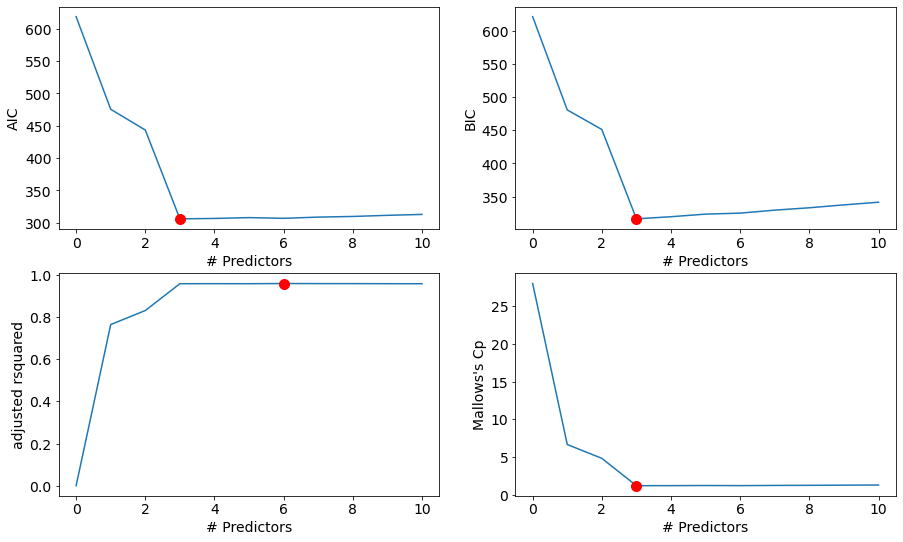

In [19]:
vs_aic = extract(use_aic)
vs_bic = extract(use_bic)
vs_rsquared_adj = extract(use_rsq)
vs_Cp = extract(use_Cp)

plt.figure(figsize=(15,9))
plt.rcParams.update({'font.size': 14, 'lines.markersize': 10})

ax = plt.subplot(2, 2, 1)
plt.plot(*vs_aic)
plt.plot(*vs_aic[:,vs_aic[1].argmin()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('AIC')

ax = plt.subplot(2, 2, 2)
plt.plot(*vs_bic)
plt.plot(*vs_bic[:,vs_bic[1].argmin()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('BIC')

ax = plt.subplot(2, 2, 3)
plt.plot(*vs_rsquared_adj)
plt.plot(*vs_rsquared_adj[:,vs_rsquared_adj[1].argmax()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('adjusted rsquared')

ax = plt.subplot(2, 2, 4)
plt.plot(*vs_Cp)
plt.plot(*vs_Cp[:,vs_Cp[1].argmin()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('Mallows\'s Cp')

In [64]:
vs_Cp[:,vs_Cp[1].argmin()]

array([3.        , 1.22506078])

# Forward model coefficient

In [20]:
dict(zip(
    betas[np.hstack([[True],as_bool_array(use_aic[vs_aic[1].argmin()][2], p)])],
    use_aic[vs_aic[1].argmin()][1].params))

{'beta0': 3.863214775997744,
 'beta1': 2.59863529104834,
 'beta2': 1.991233468676993,
 'beta3': 1.1462655913185709}

# 結論

Forward model 結果與 (c) 相同。

# Do backward

In [21]:
first_model = make_model(XS, Y)

init_ps = np.arange(XS.shape[-1])

use_aic = [[first_model.aic, first_model, init_ps]]
use_bic = [[first_model.bic, first_model, init_ps]]
use_rsq = [[first_model.rsquared_adj, first_model, init_ps]]
use_Cp  = [[first_model.Cp, first_model, init_ps]]

for i in range(XS.shape[-1]):
    ac = backward(XS, Y, use_aic[-1][2], 'aic <')
    bc = backward(XS, Y, use_bic[-1][2], 'bic <')
    rs = backward(XS, Y, use_rsq[-1][2], 'rsquared_adj >')
    cp = backward(XS, Y, use_Cp[-1][2], 'Cp <')
    use_aic.append(ac)
    use_bic.append(bc)
    use_rsq.append(rs)
    use_Cp.append(cp)

# Plot backward results

Text(0, 0.5, "Mallows's Cp")

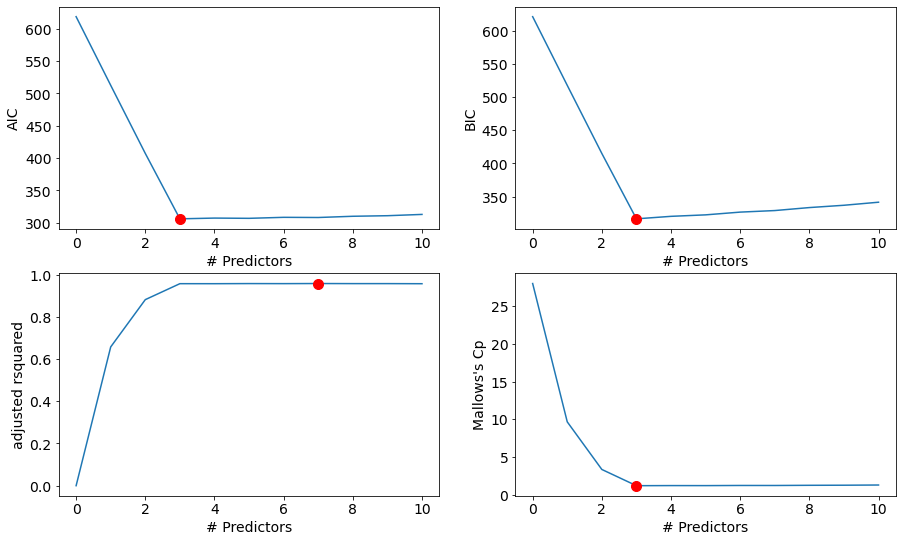

In [22]:
vs_aic = extract(use_aic)
vs_bic = extract(use_bic)
vs_rsquared_adj = extract(use_rsq)
vs_Cp = extract(use_Cp)

plt.figure(figsize=(15,9))
plt.rcParams.update({'font.size': 14, 'lines.markersize': 10})

ax = plt.subplot(2, 2, 1)
plt.plot(*vs_aic)
plt.plot(*vs_aic[:,vs_aic[1].argmin()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('AIC')

ax = plt.subplot(2, 2, 2)
plt.plot(*vs_bic)
plt.plot(*vs_bic[:,vs_bic[1].argmin()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('BIC')

ax = plt.subplot(2, 2, 3)
plt.plot(*vs_rsquared_adj)
plt.plot(*vs_rsquared_adj[:,vs_rsquared_adj[1].argmax()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('adjusted rsquared')

ax = plt.subplot(2, 2, 4)
plt.plot(*vs_Cp)
plt.plot(*vs_Cp[:,vs_Cp[1].argmin()], 'or')
ax.set_xlabel('# Predictors')
ax.set_ylabel('Mallows\'s Cp')

# Backward model coefficient

In [23]:
dict(zip(
    betas[np.hstack([[True],as_bool_array(use_aic[vs_aic[1].argmin()][2], p)])],
    use_aic[vs_aic[1].argmin()][1].params))

{'beta0': 3.863214775997744,
 'beta1': 2.59863529104834,
 'beta2': 1.991233468676993,
 'beta3': 1.1462655913185709}

# 結論

Backward model 結果與 (c) 相同。

(e) Now fit a lasso model to the simulated data, again using $X,X^2, \dots ,X^{10}$ as predictors. Use cross-validation to select the optimal
value of $\lambda$. Create plots of the cross-validation error as a function
of $\lambda$. Report the resulting coefficient estimates, and discuss the
results obtained.

[sklearn.linear_model.LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)<br>
[skLearn 回归模型](https://blog.csdn.net/qq_45797116/article/details/112676554)

array([0.0900628 , 1.38480224])

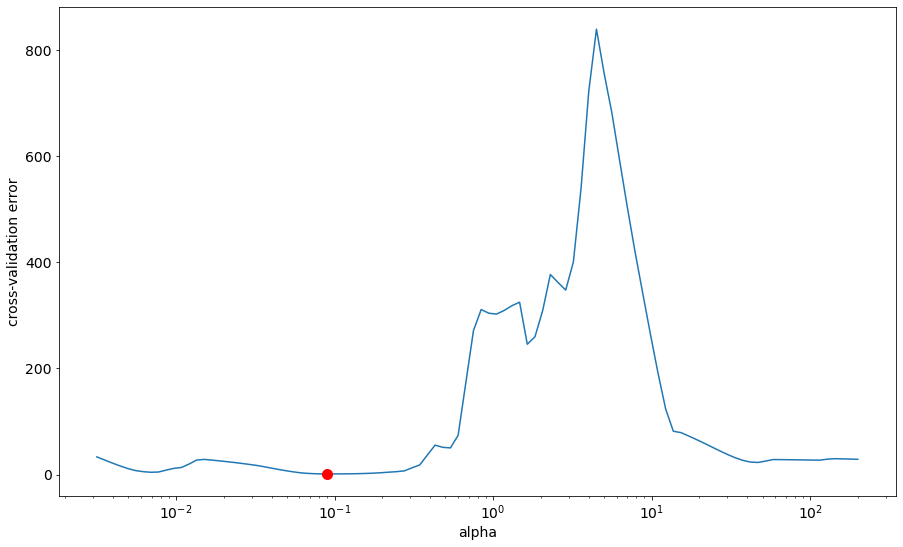

In [24]:
# coding your answer here.
alphas = 10**np.linspace(2.3,-2.5,100)

kf = KFold(n_splits=10, shuffle=True, random_state=1)
lassocv = LassoCV(alphas=alphas, cv=kf, max_iter=10000000)

lassocv.fit(XS, Y)

XX = np.array([alphas, lassocv.mse_path_.mean(axis=1)])  # 改變 alpha，每個摺疊上測試集的均方誤差

plt.figure(figsize=(15,9))
plt.plot(*XX)
plt.plot(*XX[:,XX[1].argmin()], "or")
plt.xscale("log")

plt.xlabel('alpha')
plt.ylabel('cross-validation error')

XX[:,XX[1].argmin()]

In [80]:
# XX

array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  8.        ,  9.        , 10.        ,
        11.        , 12.        , 13.        , 14.        , 15.        ,
        16.        , 17.        , 18.        , 19.        , 20.        ],
       [16.10859204, 12.75827737,  9.65362072,  7.18480346,  5.13802543,
         3.07830561,  1.76910026,  1.153996  ,  1.13669748,  1.11603286,
         1.13575007,  1.15909038,  1.18689563,  1.21488039,  1.23108672,
         1.24053083,  1.2420591 ,  1.23927747,  1.23864904,  1.23863722]])

In [81]:
# XX[:,XX[1].argmin()]

array([10.        ,  1.11603286])

Text(0, 0.5, 'coefficient')

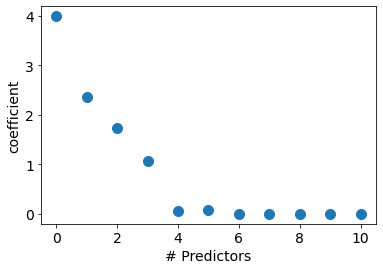

In [25]:
plt.scatter(np.arange(lassocv.coef_.shape[0] + 1), [lassocv.intercept_] + list(lassocv.coef_))
plt.xlabel('# Predictors')
plt.ylabel('coefficient')

# Cross-validation Lasso model coefficients

In [26]:
dict(zip(betas, [lassocv.intercept_] + list(lassocv.coef_)))

{'beta0': 3.993244436872855,
 'beta1': 2.353896775463213,
 'beta2': 1.7286847647158352,
 'beta3': 1.0593893401114811,
 'beta4': 0.056010761871674475,
 'beta5': 0.0785298210297785,
 'beta6': 0.0,
 'beta7': 0.0,
 'beta8': -0.0,
 'beta9': -0.0016914269166037879,
 'beta10': -0.00017590432718289636}

> Ans:  
  從以上的報表我們可以看出模型做出來的 $\hat{\beta}$ 都與真實的 $\beta$ 很接近。

## 10
We have seen that as the number of features used in a model increases,
the training error will necessarily decrease, but the test error may not.
We will now explore this in a simulated data set.

In [27]:
# pip install mlxtend

```python
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split  # To split dataset (train + test datasets)
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS  
# mlxtend package: exhaustive (詳盡) search for feature selection

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
```

(a) Generate a data set with $p = 20$ features, $n = 1,000$ observations,
and an associated quantitative response vector generated according to the model

$$Y=X\beta+\epsilon$$

where $\beta$ has some elements that are exactly equal to zero.

```python
# coding your answer here.

np.random.seed(0)

# Dataframe with random numbers and the specified dimensions
n = 1000
p = 20
X = pd.DataFrame(np.random.normal(size=(n, p)))

# Epsilon
epsilon = np.random.normal(size=n)

# Coefficient b1
b1 = np.random.normal(size=p)
# Random number of b1 elements with value zero
for i in range(0, np.random.randint(0,p)):
    b1[np.random.randint(0,p)] = 0

# Final expression
# y must be a vector with 1000 rows.
y = np.dot(X, b1) + epsilon
```

In [28]:
# coding your answer here.
p = 20
n = 1000
X = np.random.randn(n, p)
𝛽 = np.random.randint(0, 2, p) * np.random.randn(p)
𝜖 = np.random.normal(size = n)

Y = X.dot(𝛽) + 𝜖

print(𝛽)

[-1.39232162 -0.         -1.72092274 -0.          0.          2.0502262
  2.00246163 -0.         -0.         -0.1808161   0.          0.
 -0.70096066  1.68348329  0.         -0.19770791 -1.01131877  0.
 -0.         -1.49923546]


In [45]:
np.random.randint(0, 2, 10)  # low, high=None 0-1

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0])

(b) Split your data set into a training set containing $100$ observations
and a test set containing $900$ observations.

In [29]:
# coding your answer here.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9)

(c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

In [30]:
import gc
gc.collect()

# 清除内存，尽量避免主动调用 gc.collect()
# 除非当你 new 出一个大对象，使用完毕后希望立刻回收，释放内存

75

In [31]:
subs = all_subsets(p)

X_train_with_const = sm.add_constant(X_train)

subs_with_const = [[True] + list(bool_arr) for bool_arr in subs]

subs_with_const_and_length = [(sum(bool_arr), bool_arr) for bool_arr in subs_with_const]

subs_with_const_and_length.sort()

In [32]:
# coding your answer here.
full_model = sm.OLS(Y_train, X_train).fit()

best_ssr_model = [[np.inf, None, None] for i in range(p)]

for i in tqdm(range(len(subs_with_const_and_length)), position=0):
    part_model = sm.OLS(Y_train, sm.add_constant(X_train_with_const[:,subs_with_const_and_length[i][1]])).fit()
    part_model.Cp = Cp(part_model, full_model)
    
    if best_ssr_model[subs_with_const_and_length[i][0] - 2][0] > part_model.ssr:
        best_ssr_model[subs_with_const_and_length[i][0] - 2][0] = part_model.ssr
        best_ssr_model[subs_with_const_and_length[i][0] - 2][1] = i
        best_ssr_model[subs_with_const_and_length[i][0] - 2][2] = part_model

100%|██████████████████████████████████████████████████████████████████████| 1048575/1048575 [08:17<00:00, 2106.40it/s]


In [33]:
MSE = lambda model: model.ssr / (model.nobs - model.df_model - 1)

# Predictors: 12


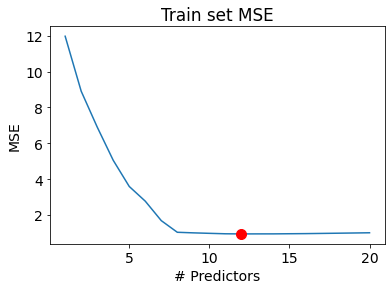

In [34]:
XX = np.array([[i, MSE(item[2])] for i, item in enumerate(best_ssr_model, 1)]).T
plt.plot(*XX)
plt.plot(*XX[:,XX[1].argmin()], "or")
plt.title('Train set MSE')
plt.xlabel('# Predictors')
plt.ylabel('MSE')

print("# Predictors:", sum(subs_with_const_and_length[best_ssr_model[XX[1].argmin()][1]][1][1:]))

(d) Plot the test set MSE associated with the best model of each size.

# Predictors: 10


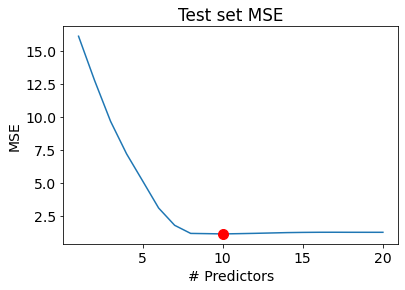

In [35]:
# coding your answer here.
get_partial = lambda ssr_model: sm.add_constant(X_test)[:,subs_with_const_and_length[ssr_model[1]][1]]
get_predict = lambda ssr_model: ssr_model[2].predict(get_partial(ssr_model))

XX = np.array([[i, mean_squared_error(Y_test, get_predict(item))] for i, item in enumerate(best_ssr_model, 1)]).T
plt.plot(*XX)
plt.plot(*XX[:,XX[1].argmin()], "or")
plt.title('Test set MSE')
plt.xlabel('# Predictors')
plt.ylabel('MSE')

print("# Predictors:", sum(subs_with_const_and_length[best_ssr_model[XX[1].argmin()][1]][1][1:]))

(e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

In [36]:
# coding your answer here.
print(best_ssr_model[XX[1].argmin()][2].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     152.0
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           1.84e-51
Time:                        19:50:24   Log-Likelihood:                -135.18
No. Observations:                 100   AIC:                             292.4
Df Residuals:                      89   BIC:                             321.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0387      0.106     -0.365      0.7

> Ans: 11

(f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [37]:
coefs = np.array(subs_with_const_and_length[best_ssr_model[XX[1].argmin()][1]][1], dtype=float)
coefs[subs_with_const_and_length[best_ssr_model[XX[1].argmin()][1]][1]] = best_ssr_model[XX[1].argmin()][2].params

In [38]:
# coding your answer here.
print("Estimate betas:")
for i, c in enumerate(coefs):
    print(f"beta{i}:", c)
    
print()
    
print("True betas:")
for i, c in enumerate(np.hstack([[0], 𝛽])):
    print(f"beta{i}:", c)

Estimate betas:
beta0: -0.038720860970739124
beta1: -1.212430362695351
beta2: 0.0
beta3: -1.801020345646451
beta4: 0.0
beta5: 0.0
beta6: 2.0291684414409783
beta7: 1.8975490977876486
beta8: 0.0
beta9: 0.0
beta10: -0.20237363724806456
beta11: 0.0
beta12: 0.0
beta13: -0.6751758219508981
beta14: 1.7182668475978027
beta15: 0.0
beta16: -0.21555117541244184
beta17: -1.0985320444113
beta18: 0.0
beta19: 0.0
beta20: -1.4195376891581208

True betas:
beta0: 0.0
beta1: -1.3923216203501407
beta2: -0.0
beta3: -1.7209227375914464
beta4: -0.0
beta5: 0.0
beta6: 2.0502262033862286
beta7: 2.002461634826464
beta8: -0.0
beta9: -0.0
beta10: -0.18081610481579105
beta11: 0.0
beta12: 0.0
beta13: -0.7009606639450695
beta14: 1.683483289490785
beta15: 0.0
beta16: -0.19770790667915128
beta17: -1.0113187741294054
beta18: 0.0
beta19: -0.0
beta20: -1.4992354607595042


> Ans:  
$\text{Estimate betas:}$  
$
\beta_{0}: -0.1999 \\
\beta_{1}: 0.0000 \\
\beta_{2}: 0.0000 \\
\beta_{3}: -1.4221 \\
\beta_{4}: -0.4268 \\
\beta_{5}: -0.6899 \\
\beta_{6}: 0.5854 \\
\beta_{7}: -0.1990 \\
\beta_{8}: -0.5611 \\
\beta_{9}: 0.2426 \\
\beta_{10}: 0.0000 \\
\beta_{11}: 0.0000 \\
\beta_{12}: 0.0000 \\
\beta_{13}: 0.0000 \\
\beta_{14}: 0.0000 \\
\beta_{15}: 0.5484 \\
\beta_{16}: -0.8283 \\
\beta_{17}: 0.0000 \\
\beta_{18}: 0.6819 \\
\beta_{19}: -0.8241 \\
\beta_{20}: 0.0000 \\
$

> $\text{True betas:}$  
$
\beta_{0}: 0.0000 \\
\beta_{1}: 0.0000 \\
\beta_{2}: -1.3869 \\
\beta_{3}: -0.2869 \\
\beta_{4}: -0.6718 \\
\beta_{5}: 0.6277 \\
\beta_{6}: -0.2877 \\
\beta_{7}: -0.5374 \\
\beta_{8}: 0.2378 \\
\beta_{9}: 0.0000 \\
\beta_{10}: -0.0000 \\
\beta_{11}: -0.0000 \\
\beta_{12}: -0.0000 \\
\beta_{13}: 0.0000 \\
\beta_{14}: 0.6156 \\
\beta_{15}: -0.8570 \\
\beta_{16}: -0.0000 \\
\beta_{17}: 0.4746 \\
\beta_{18}: -0.7618 \\
\beta_{19}: -0.0000 \\
$

(g) Create a plot displaying $\sqrt{\sum_{j=1}^p\left(\beta_j-\hat{\beta}_j^r\right)^2}$ for a range of values of $r$, where $\hat{\beta}_j^r$ is the $j$th coefficient estimate for the best model containing $r$ coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

Text(0, 0.5, 'Coefficient error & Test set MSE')

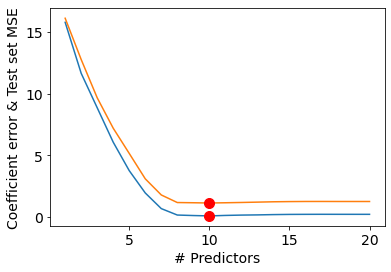

In [39]:
# coding your answer here.
def get_coefs(nps):
    coefs = np.array(subs_with_const_and_length[best_ssr_model[nps][1]][1], dtype=float)
    coefs[subs_with_const_and_length[best_ssr_model[nps][1]][1]] = best_ssr_model[nps][2].params
    return coefs

xys = np.array([[i + 1, ((get_coefs(i) - np.hstack([[0], 𝛽]))**2).sum()] for i in range(20)]).T

plt.plot(*xys)
plt.plot(*xys[:,xys[1].argmin()], "or")

plt.plot(*XX)
plt.plot(*XX[:,XX[1].argmin()], "or")

plt.xlabel('# Predictors')
plt.ylabel('Coefficient error & Test set MSE')

> Ans:  
藍線是係數誤差，橘線是 (d) 中的圖，雖然兩者 y 軸單位不同，但可看出相關性很高，且最低點相同。